## Import Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

## 2. Read the training Data

In [2]:
file_path = r"E:\Flight_Price_sagemaker\Data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-06,Kolkata,Banglore,08:25:00,18:15:00,590,1.0,In-flight meal not included,10844
1,Air India,2019-03-01,Banglore,New Delhi,05:50:00,08:50:00,1620,3.0,No Info,13081
2,Indigo,2019-03-06,Delhi,Cochin,18:35:00,01:35:00,420,1.0,No Info,14871
3,Air India,2019-03-24,Kolkata,Banglore,07:00:00,10:00:00,1620,2.0,No Info,11491
4,Air India,2019-04-06,Kolkata,Banglore,20:45:00,23:20:00,155,0.0,No Info,4460
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-03-09,Chennai,Kolkata,05:15:00,07:35:00,140,0.0,No Info,6482
636,Spicejet,2019-05-24,Chennai,Kolkata,17:45:00,20:05:00,140,0.0,No Info,3597
637,Indigo,2019-06-12,Mumbai,Hyderabad,01:40:00,03:10:00,90,0.0,No Info,2754
638,Spicejet,2019-05-15,Kolkata,Banglore,06:55:00,09:30:00,155,0.0,No check-in baggage included,3841


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
        col: pd.to_datetime(train.loc[:, col])
        for col in ["date_of_journey", "dep_time", "arrival_time"]
    })
train.dtypes

C:\Users\kusha\AppData\Local\Temp\ipykernel_2136\266844949.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(train.loc[:, col])
C:\Users\kusha\AppData\Local\Temp\ipykernel_2136\266844949.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(train.loc[:, col])


airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## 3. High-level Summary of Data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      639 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [6]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,639.000000,640.000000
mean,612.953125,0.766823,8732.009375
std,506.403546,0.653249,4034.463371
min,80.000000,0.000000,1965.000000
25%,170.000000,0.000000,5264.750000
50%,450.000000,1.000000,8040.000000
75%,916.250000,1.000000,11424.250000
max,2565.000000,3.000000,26890.000000


In [7]:
(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,639.0,640
unique,9,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,237,247,247,344.0,494


## 4. High-level analysis of Missing Values

In [8]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.15625


## 5. High_level analysis of Outliers

In [9]:
from sklearn.ensemble import IsolationForest

In [10]:
forest = IsolationForest(n_estimators = 10, random_state=42)

In [11]:
# (
#     train
#     .assign(outlier=forest.fit_predict(train
#                                        .drop(columns="price")
#                                        .select_dtypes(include="number")))
#     .query("outlier == -1")
#     # .duration
#     # .describe()
# )

## 6. Pari Plots

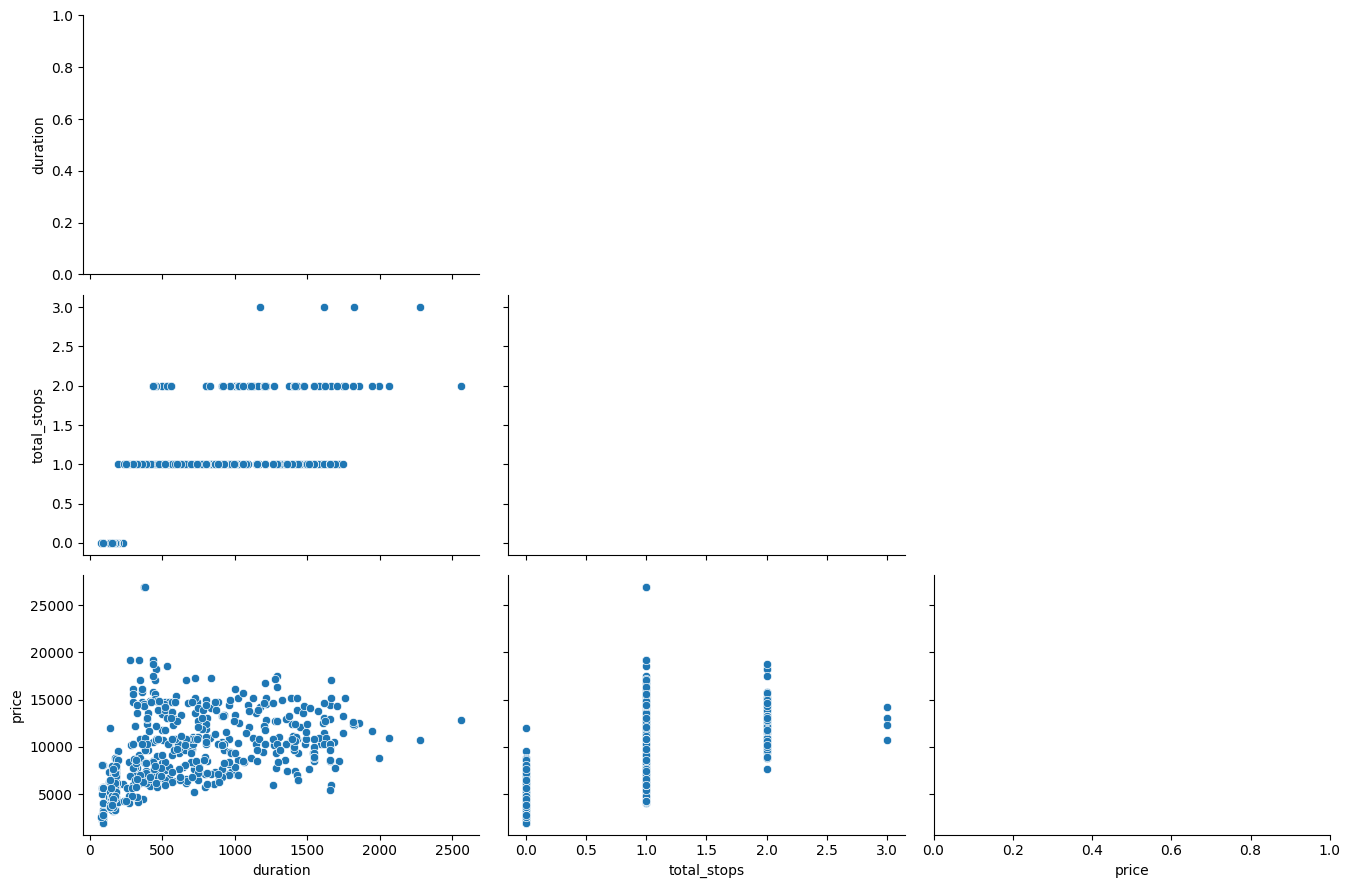

In [12]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

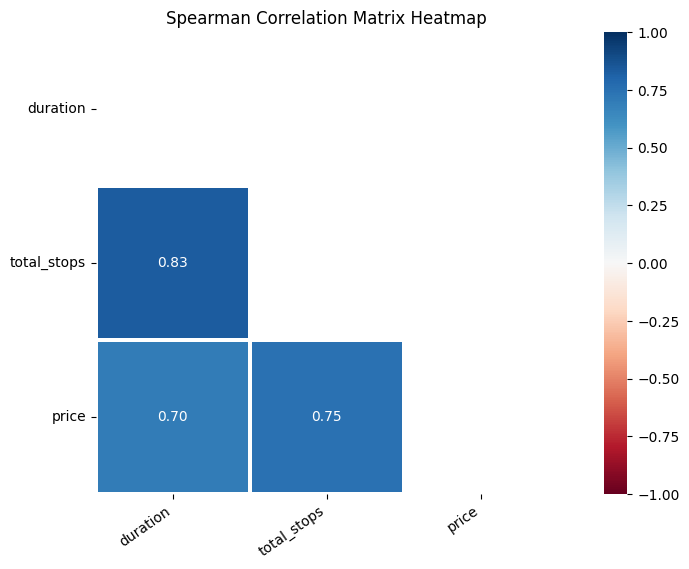

In [13]:
eda_helper_functions.correlation_heatmap(train)

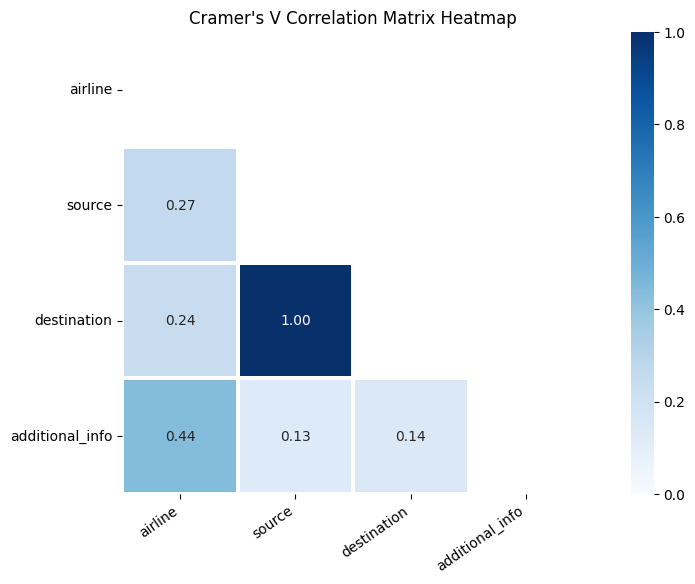

In [14]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [15]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [16]:
train.airline

0      Jet Airways
1        Air India
2           Indigo
3        Air India
4        Air India
          ...     
635         Indigo
636       Spicejet
637         Indigo
638       Spicejet
639    Jet Airways
Name: airline, Length: 640, dtype: object

In [17]:
eda_helper_functions.cat_summary(train, "airline")

0      Jet Airways
1        Air India
2           Indigo
3        Air India
4        Air India
          ...     
635         Indigo
636       Spicejet
637         Indigo
638       Spicejet
639    Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,237


,count,percentage
category,,
Jet Airways,237,0.370312
Indigo,142,0.221875
Air India,89,0.139063
Multiple Carriers,63,0.098437
Spicejet,50,0.078125
Vistara,29,0.045312
Air Asia,15,0.023438
Goair,14,0.021875
Trujet,1,0.001563


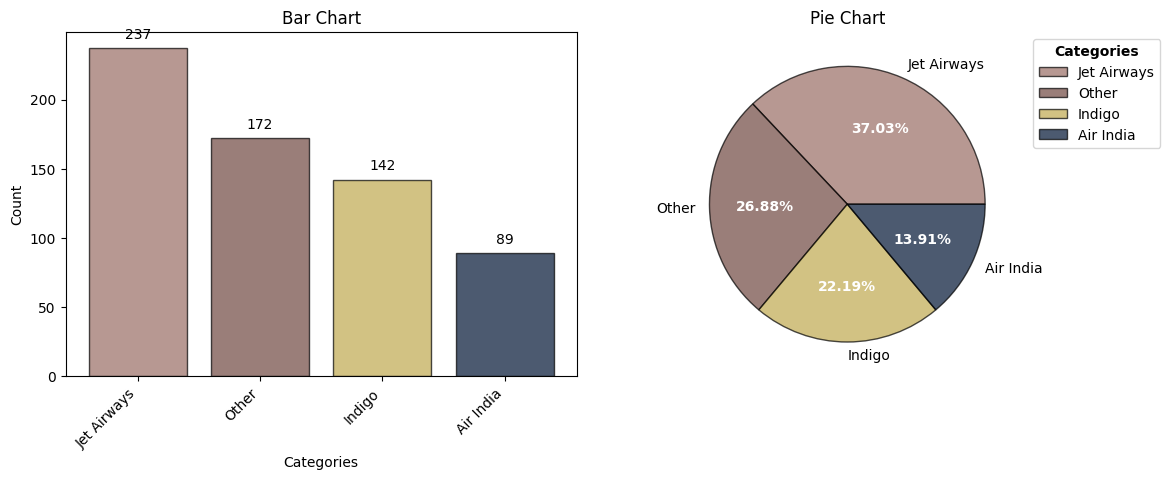

In [18]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

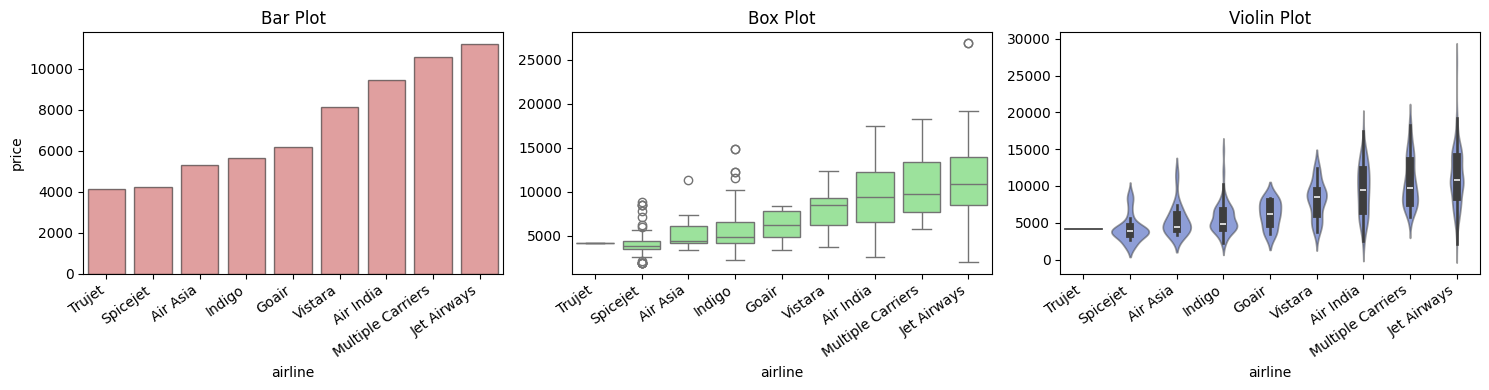

In [19]:
eda_helper_functions.num_cat_bivar_plots(
    data = train, 
    num_var = "price", 
    cat_var = "airline"
)

In [20]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 57.39022667198473
- p-value              : 4.9203369017625653e-70
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 305.62385943059786
- p-value              : 2.615148013085573e-61
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


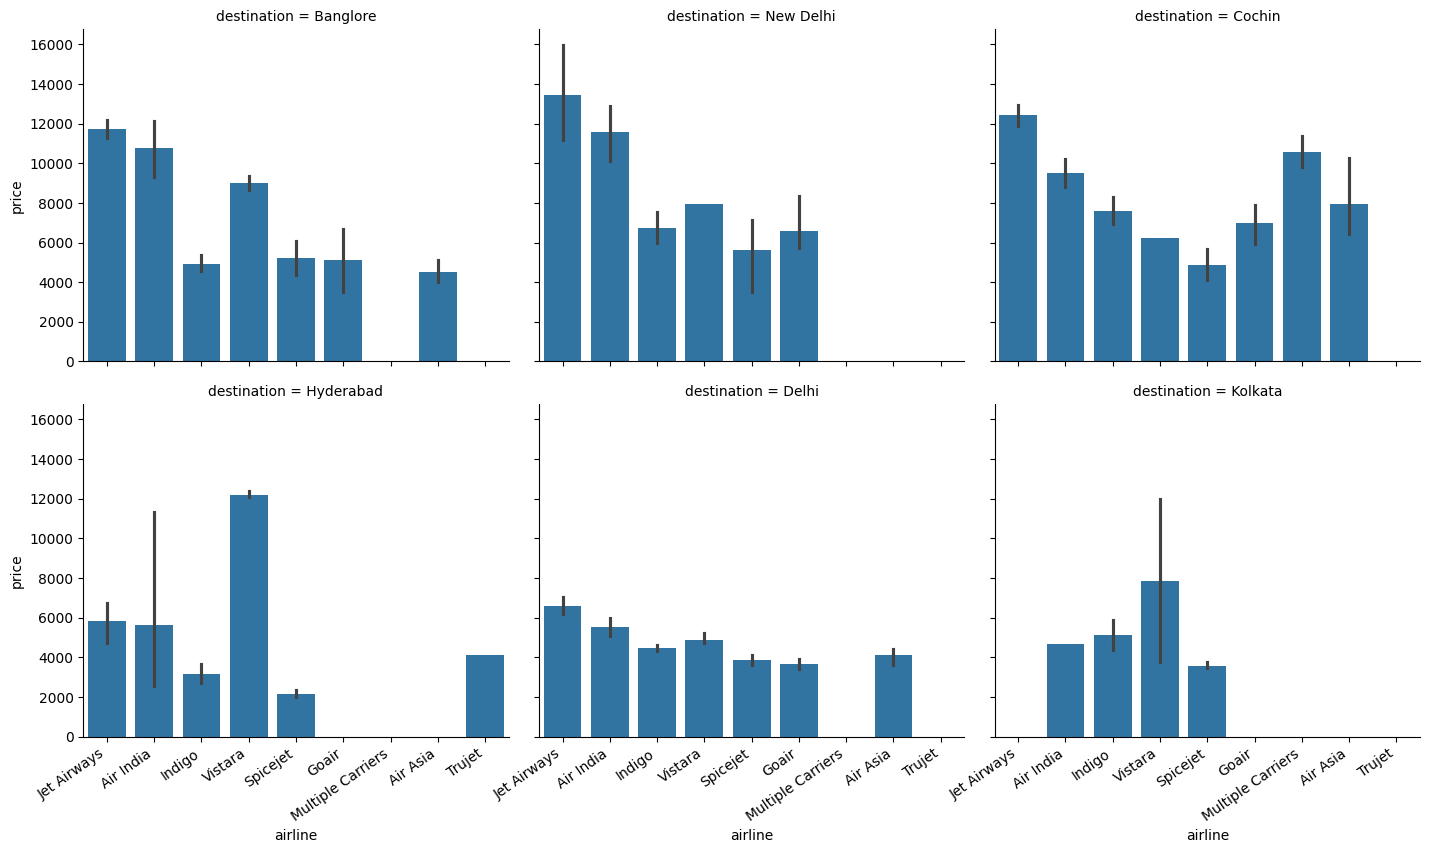

In [21]:
airline_grid = sns.FacetGrid(
    data = train,
    col = "destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey = True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [22]:
train.date_of_journey

0     2019-05-06
1     2019-03-01
2     2019-03-06
3     2019-03-24
4     2019-04-06
         ...    
635   2019-03-09
636   2019-05-24
637   2019-06-12
638   2019-05-15
639   2019-05-12
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

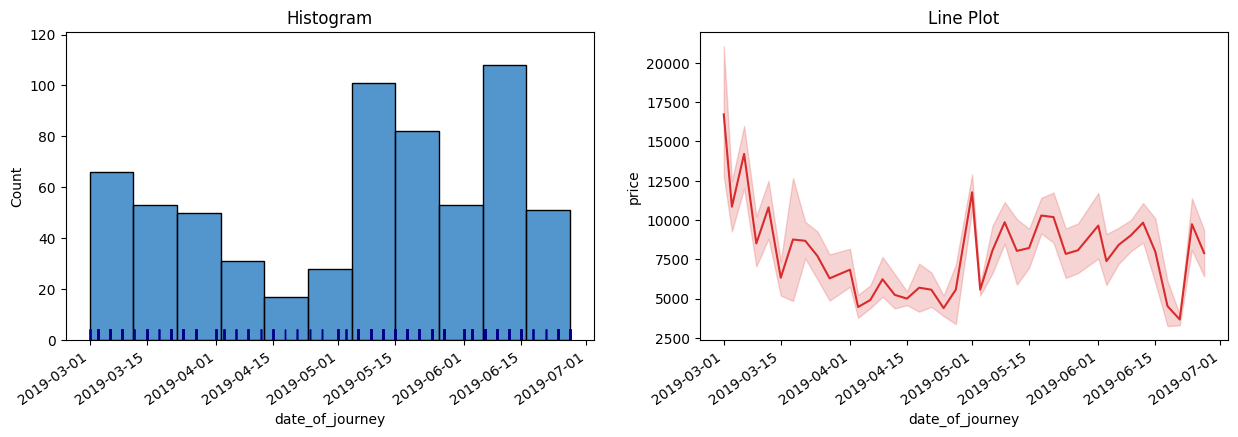

In [23]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

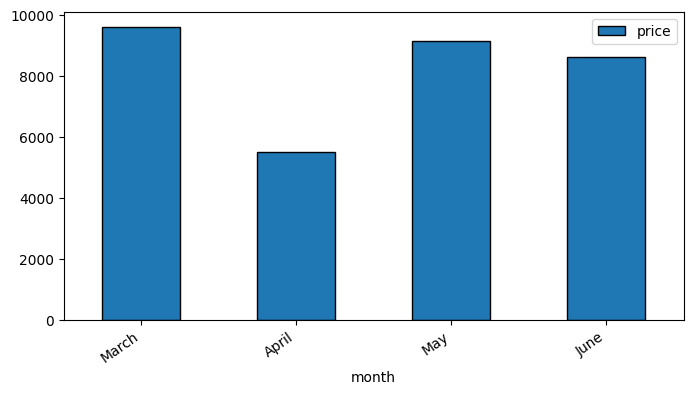

In [24]:
 (
     train
     .groupby(pd.Grouper(key="date_of_journey", freq="M"))
     .price.mean()
     .to_frame()
     .set_axis(["March", "April", "May", "June"], axis=0)
     .rename_axis(index="month")
     .plot(
         kind="bar",
         figsize=(8, 4),
         edgecolor="black"
     )
 )

ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

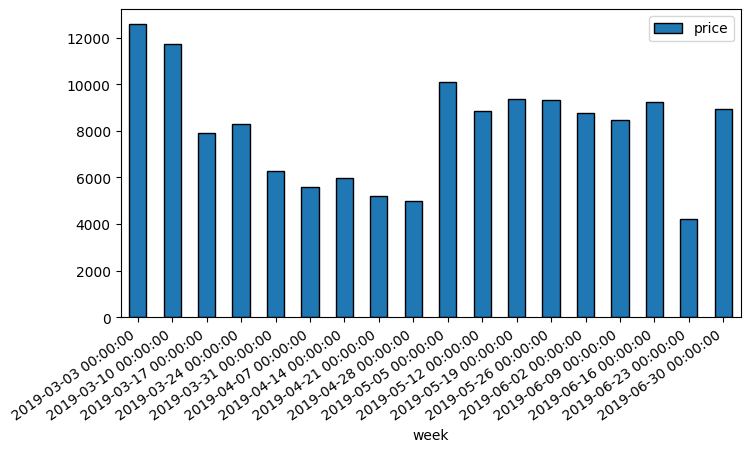

In [25]:
 (
     train
     .groupby(pd.Grouper(key="date_of_journey", freq="W"))
     .price.mean()
     .to_frame()
     # .set_axis(["March", "April", "May", "June"], axis=0)
     .rename_axis(index="week")
     .plot(
         kind="bar",
         figsize=(8, 4),
         edgecolor="black"
     )
 )

ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

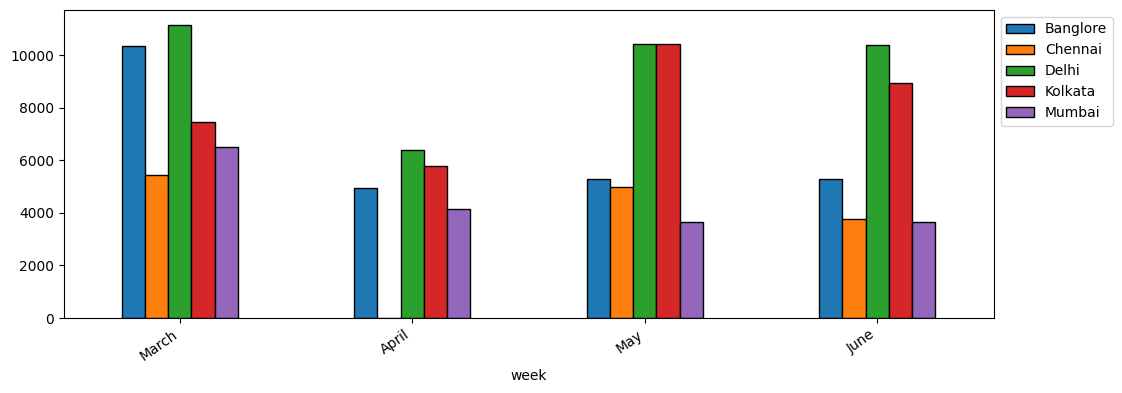

In [26]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
    .unstack()
    .set_axis(["March", "April", "May", "June"], axis=0)
     .rename_axis(index="week")
     .plot(
         kind="bar",
         figsize=(12, 4),
         edgecolor="black"
     )
)
ax = plt.gca()

ax.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [27]:
train.dep_time

0     2024-05-19 08:25:00
1     2024-05-19 05:50:00
2     2024-05-19 18:35:00
3     2024-05-19 07:00:00
4     2024-05-19 20:45:00
              ...        
635   2024-05-19 05:15:00
636   2024-05-19 17:45:00
637   2024-05-19 01:40:00
638   2024-05-19 06:55:00
639   2024-05-19 20:00:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

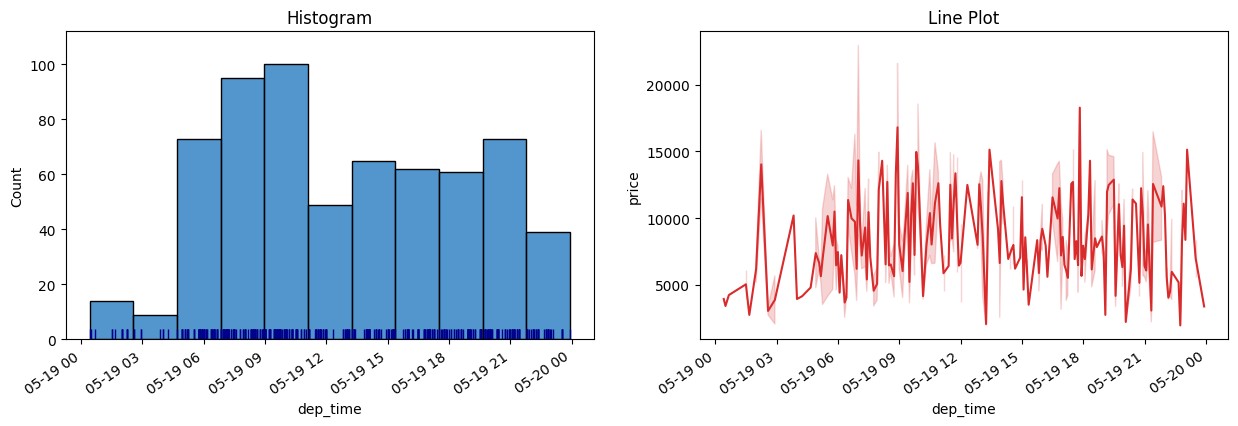

In [28]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

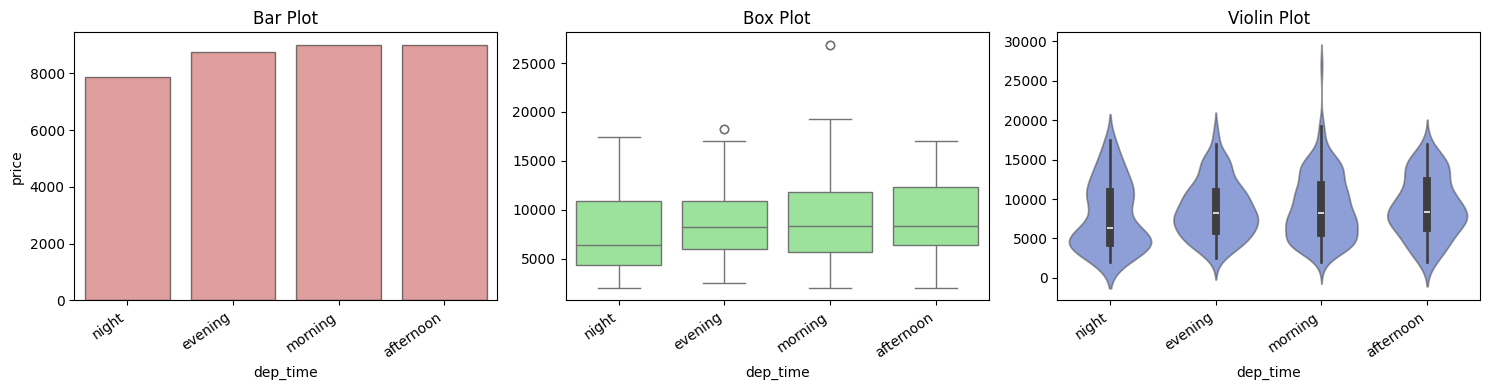

In [29]:
(
    train
    .assign(dep_time=lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
                   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
                   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
                   ["morning", "afternoon", "evening"],
                    default="night")
    ))
   .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [30]:
train.duration

0       590
1      1620
2       420
3      1620
4       155
       ... 
635     140
636     140
637      90
638     155
639     800
Name: duration, Length: 640, dtype: int64

In [31]:
eda_helper_functions.num_summary(train, "duration")

0       590
1      1620
2       420
3      1620
4       155
       ... 
635     140
636     140
637      90
638     155
639     800
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,80.00
5,90.00
10,145.00
25,170.00
50,450.00
75,916.25
90,1440.00
95,1620.00
99,1823.05


,value
mean,612.953125
trimmed mean (5%),577.795139
trimmed mean (10%),545.976562
median,450.000000


,value
var,256444.551790
std,506.403546
IQR,746.250000
mad,285.000000
coef_variance,0.826170


,value
skewness,0.957174
kurtosis,-0.077988


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 6.066972712051206e-23
Test Statistic       : 0.8662669062614441
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 30.07426354862855
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [32]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.00
0.50    450.00
0.75    916.25
Name: duration, dtype: float64

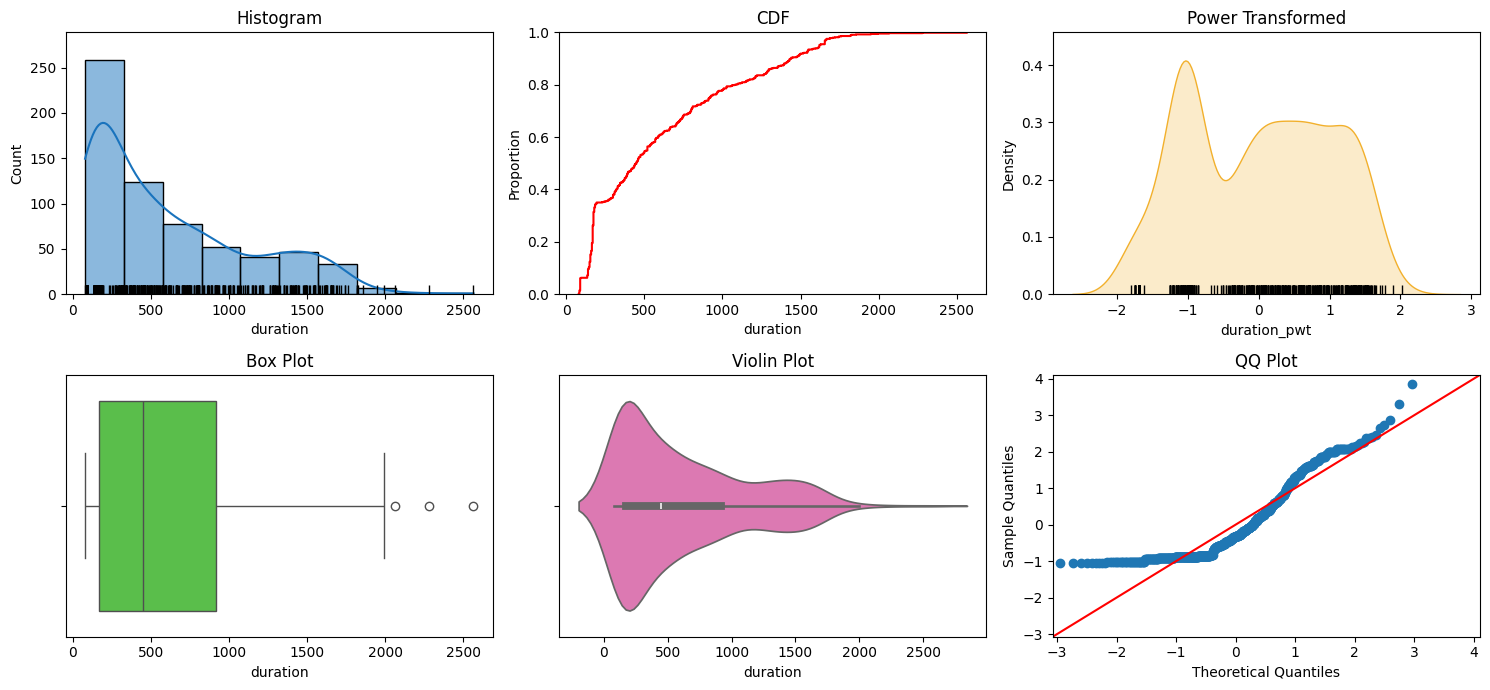

In [33]:
eda_helper_functions.num_univar_plots(train, "duration")

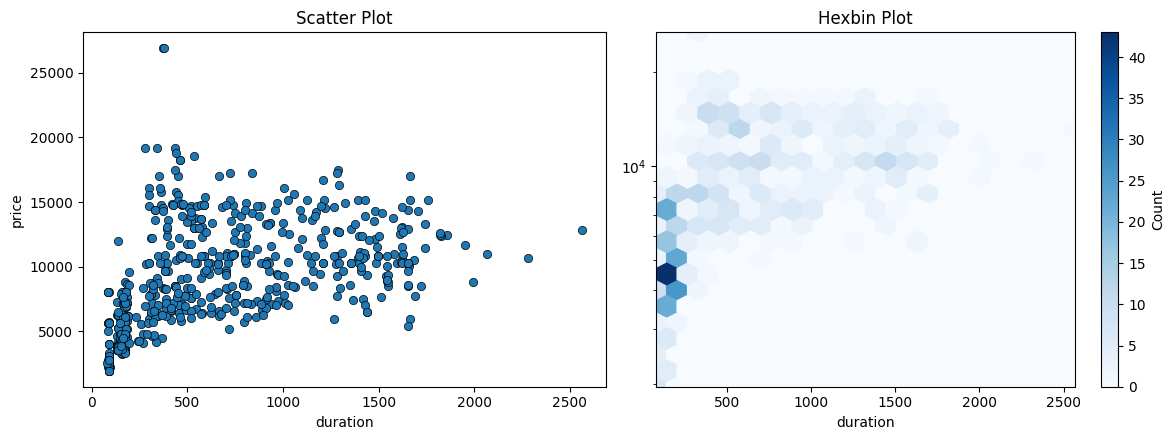

In [34]:
eda_helper_functions.num_bivar_plots(
    train, 
    "duration",
    "price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=20,
        cmap="Blues"
    )
)

In [35]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5181989324373857
- p-value              : 2.895329742370994e-45
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7008878116638416
- p-value              : 1.0706084097427072e-95
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


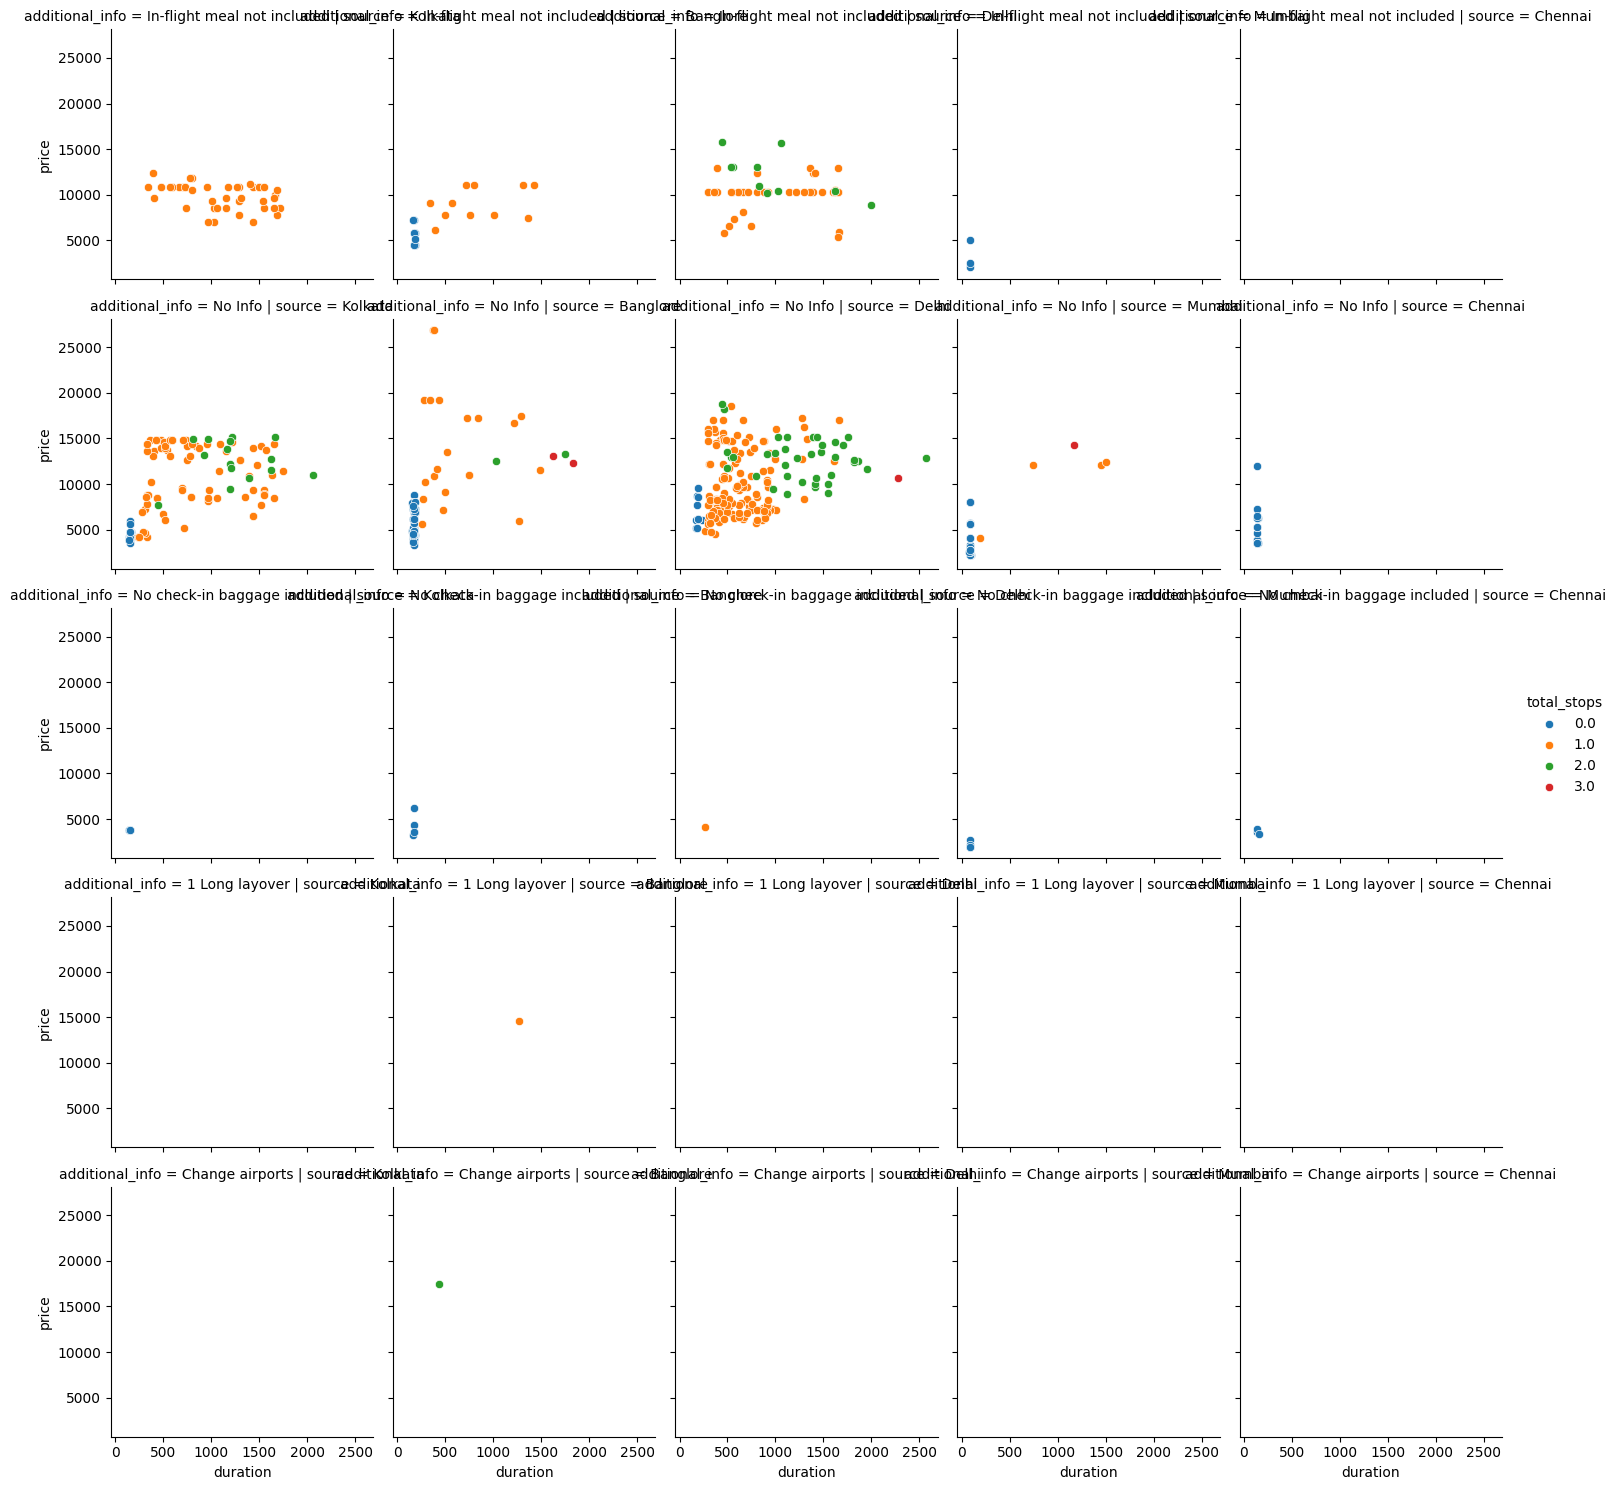

In [36]:
duration_grid = sns.FacetGrid(
    data=train,
    col = "source",
    row = "additional_info",
    hue = "total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")
duration_grid.add_legend()

## 9. Automated EDA

In [37]:
# pip install ydata-profiling==4.1.2

In [38]:
# from ydata_profiling import ProfileReport

In [39]:
# report = ProfileReport(train)

In [40]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -949.375
Upper Limit : 2035.625


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
427,Air India,2019-05-01,Kolkata,Banglore,2024-05-19 05:50:00,2024-05-19 16:15:00,2065,2.0,No Info,10991
601,Air India,2019-05-09,Delhi,Cochin,2024-05-19 05:15:00,2024-05-19 19:15:00,2280,3.0,No Info,10703
595,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-19 09:40:00,2024-05-19 04:25:00,2565,2.0,No Info,12819


### 8.5 additional_info

In [41]:
eda_helper_functions.cat_summary(train, "additional_info")

0       In-flight meal not included
1                           No Info
2                           No Info
3                           No Info
4                           No Info
                   ...             
635                         No Info
636                         No Info
637                         No Info
638    No check-in baggage included
639                         No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,No Info
freq,494


,count,percentage
category,,
No Info,494,0.771875
In-flight meal not included,121,0.189062
No check-in baggage included,23,0.035937
1 Long layover,1,0.001563
Change airports,1,0.001563
